# Airline Passenger Forecasting with RNN- LSTM Models

### Importing the Required Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM, Bidirectional,Dense
from keras import Sequential

### Reading the Data

In [2]:
data = pd.read_csv('International Airline Passengers.csv',index_col='Month', parse_dates= True)

In [3]:
data

,No_passengers_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Exploratory Data Analysis 

In [4]:
data.head(5),data.tail(5)

(            No_passengers_thousands
 Month                              
 1949-01-01                      112
 1949-02-01                      118
 1949-03-01                      132
 1949-04-01                      129
 1949-05-01                      121,
             No_passengers_thousands
 Month                              
 1960-08-01                      606
 1960-09-01                      508
 1960-10-01                      461
 1960-11-01                      390
 1960-12-01                      432)

In [5]:
data.shape

(144, 1)

In [6]:
data.No_passengers_thousands.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: No_passengers_thousands, dtype: float64

#### <font color='Orange'>Observation:</font>
* The data starts ranges from 01-1949 to 08-1960
* Consists of 144 rows. ( 12 years data)

## Data Plots

<AxesSubplot:xlabel='Month'>

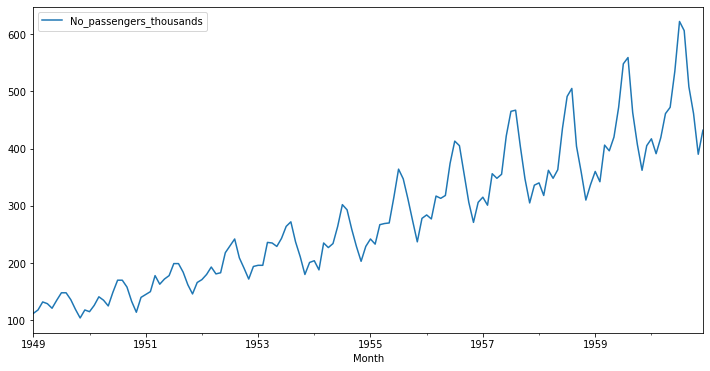

In [27]:
data.plot(figsize=(12,6))
plt.show()

In [329]:
from statsmodels.tsa.seasonal import seasonal_decompose

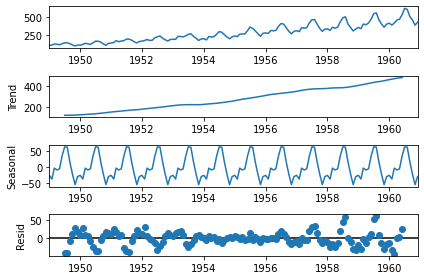

In [330]:
results = seasonal_decompose(data)
results.plot();

* Upward trend is present
* We can see seasonality at 06-09 months

# Data Preparation for LSTM

### Splitting the data into Train and Test

In [ ]:
train_data = data.iloc[:len(data)-24]
test_data = data.iloc[len(data)-24:]

In [ ]:
train_data.head(),test_data.head()

(            No_passengers_thousands
 Month                              
 1949-01-01                      112
 1949-02-01                      118
 1949-03-01                      132
 1949-04-01                      129
 1949-05-01                      121,
             No_passengers_thousands
 Month                              
 1959-01-01                      360
 1959-02-01                      342
 1959-03-01                      406
 1959-04-01                      396
 1959-05-01                      420)

### Data Preprocessing

In [30]:
scale = MinMaxScaler()
scale_train = scale.fit_transform(train_data)

In [32]:
scale_test =scale.transform(test_data)

In [36]:
scale_train.shape,scale_test.shape

((120, 1), (24, 1))

#### Data preparation for model building 

In [38]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [39]:
x_train, y_train =split_sequence(scale_train,12)
x_test, y_test = split_sequence(scale_test,12)


In [44]:
print("XTrain Shape : {}, YTrain Shape : {}".format(x_train.shape,y_train.shape))

print("Xtest Shape : {}, Ytest Shape : {}".format(x_test.shape,y_test.shape))

XTrain Shape : (108, 12, 1), YTrain Shape : (108, 1)
Xtest Shape : (12, 12, 1), Ytest Shape : (12, 1)


In [49]:
n_steps = 12
n_features =1

In [46]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features=1
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],n_features)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],n_features)

In [47]:
print("XTrain Shape : {}, YTrain Shape : {}".format(x_train.shape,y_train.shape))
print("Xtest Shape : {}, Ytest Shape : {}".format(x_test.shape,y_test.shape))


XTrain Shape : (108, 12, 1), YTrain Shape : (108, 1)
Xtest Shape : (12, 12, 1), Ytest Shape : (12, 1)


# Vanilla LSTM

In [394]:
import keras 
from keras import Sequential
from keras.layers import Dense, LSTM 

In [407]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [408]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_87 (LSTM)              (None, 100)               40800     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [409]:
# fit model
history = model.fit(x_train, y_train, epochs=300, verbose=0)

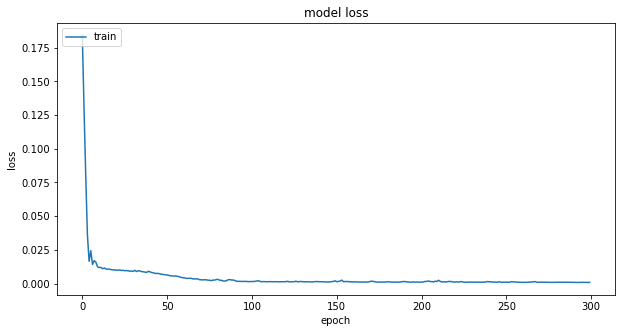

In [410]:
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction using the model

In [411]:
x_train[1].shape

(12, 1)

In [412]:
x_input =x_train[1].reshape(1,12,1)

In [413]:
yhat = model.predict(x_input, verbose=0)

In [415]:
np.append(x_input,yhat)

array([0.03491272, 0.06982544, 0.06234414, 0.04239401, 0.07730673,
       0.10972569, 0.10972569, 0.0798005 , 0.03740648, 0.        ,
       0.03491272, 0.02743142, 0.03508039])

In [416]:
yhat.shape

(1, 1)

In [417]:
n_steps

12

In [418]:
len(x_train)

108

In [419]:
last_batch.shape

(1, 12, 1)

### Model Prediciton

In [420]:
n_input=12

In [421]:
test_pred = []
#last_batch = x_train[len(x_train)-n_steps:]
last_batch= (scale_train[-n_steps:])
last_batch = last_batch.reshape(1,n_input,n_features)
for i in range(len(test_data)):
    #last_batch = last_batch.reshape(1,n_steps,n_features)
    yhat = model.predict(last_batch, verbose=0)[0]
    test_pred.append(yhat)
    last_batch = np.append(last_batch[:,1:,:],[[yhat]],axis=1)




In [422]:
model.predict(last_batch, verbose=0)[0]

array([0.57544667], dtype=float32)

In [423]:
test_pred

[array([0.5673108], dtype=float32),
 array([0.5726395], dtype=float32),
 array([0.6074253], dtype=float32),
 array([0.61990625], dtype=float32),
 array([0.71107334], dtype=float32),
 array([0.87650466], dtype=float32),
 array([1.0848651], dtype=float32),
 array([1.1041455], dtype=float32),
 array([0.83100903], dtype=float32),
 array([0.66823465], dtype=float32),
 array([0.590079], dtype=float32),
 array([0.58508456], dtype=float32),
 array([0.5708046], dtype=float32),
 array([0.5750887], dtype=float32),
 array([0.5898416], dtype=float32),
 array([0.624575], dtype=float32),
 array([0.7459459], dtype=float32),
 array([0.9409816], dtype=float32),
 array([1.2036884], dtype=float32),
 array([1.2563995], dtype=float32),
 array([0.91216415], dtype=float32),
 array([0.7152004], dtype=float32),
 array([0.6273645], dtype=float32),
 array([0.5950889], dtype=float32)]

In [424]:
true_pred =scale.inverse_transform(test_pred)

In [425]:

test_data['vanilla_prediction'] = true_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_2240\2881426380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['vanilla_prediction'] = true_pred


## Model evaluation

In [426]:
from sklearn.metrics import mean_squared_error
from math import sqrt
vanilla_rmse=sqrt(mean_squared_error(test_data['No_passengers_thousands'],true_pred))
print(vanilla_rmse)

52.67507106156051


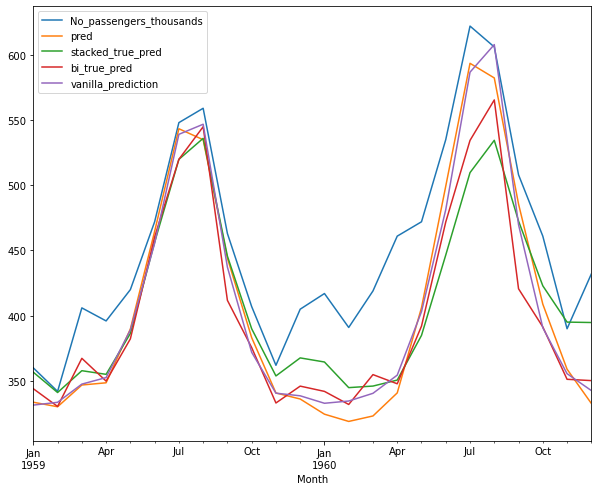

In [427]:

test_data.plot(figsize=(10,8))
plt.show()

# Stacked LSTM

In [197]:
n_steps=12
n_features=1

In [195]:
from keras.layers import Dropout

In [334]:

stacked_model = Sequential()
stacked_model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(n_steps, n_features)))
stacked_model.add(LSTM(50, activation='tanh',return_sequences=True))
stacked_model.add(LSTM(50, activation='tanh',return_sequences=True))
stacked_model.add(Dropout(0.2))
stacked_model.add(LSTM(50, activation='tanh',))
stacked_model.add(Dropout(0.2))
stacked_model.add(Dense(1))
stacked_model.compile(optimizer='adam', loss='mse')

In [339]:
stacked_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 12, 50)            10400     
                                                                 
 lstm_75 (LSTM)              (None, 12, 50)            20200     
                                                                 
 lstm_76 (LSTM)              (None, 12, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_77 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 1)               

In [336]:
# fit model
stacked_history= stacked_model.fit(x_train, y_train, epochs=1000, verbose=0)

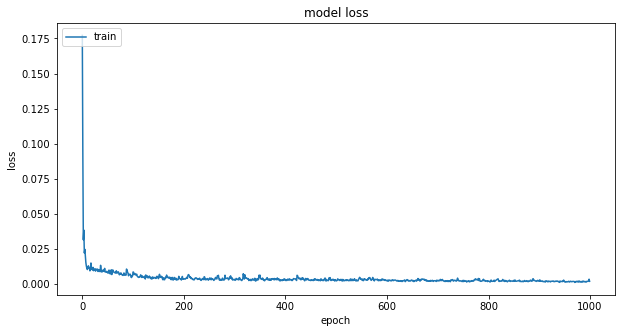

In [340]:
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(stacked_history.history['loss'])
#plt.plot(stacked_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Prediction using the model

In [219]:
'''curr_batch= (scale_train[-n_steps:])
curr_batch = curr_batch.reshape(1,n_steps,n_features)
curr_batch.shape
stacked_model.predict(curr_batch, verbose=0)[0]
stacked_test_pred.append(yhat)'''

In [341]:
stacked_test_pred = []
#last_batch = x_train[len(x_train)-n_steps:]
curr_batch= (scale_train[-n_steps:])
curr_batch = curr_batch.reshape(1,n_steps,n_features)
for i in range(len(test_data)):
    #last_batch = last_batch.reshape(1,n_steps,n_features)
    yhat = stacked_model.predict(curr_batch, verbose=0)[0]
    stacked_test_pred.append(yhat)
    curr_batch = np.append(curr_batch[:,1:,:],[[yhat]],axis=1)




In [342]:
stacked_true_pred = scale.inverse_transform(stacked_test_pred)

In [343]:
test_data['stacked_true_pred'] = stacked_true_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_2240\4108735983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['stacked_true_pred'] = stacked_true_pred


In [344]:
test_data

,No_passengers_thousands,pred,stacked_true_pred,bi_true_pred
Month,,,,
1959-01-01,360,333.685454,356.681195,337.541525
1959-02-01,342,330.215942,341.135971,325.248692
1959-03-01,406,346.884368,357.854231,348.211544
1959-04-01,396,348.584622,355.066747,341.315901
1959-05-01,420,389.814096,386.427617,364.202675
1959-06-01,472,464.654212,456.331364,437.595294
1959-07-01,548,543.316435,519.846250,497.083214
1959-08-01,559,534.907613,535.956362,523.745152
1959-09-01,463,444.094938,445.665193,409.035628


### Model Evaluation

In [347]:
stacked_rmse=sqrt(mean_squared_error(test_data['No_passengers_thousands'],stacked_true_pred))
print(stacked_rmse)

53.3790364991979


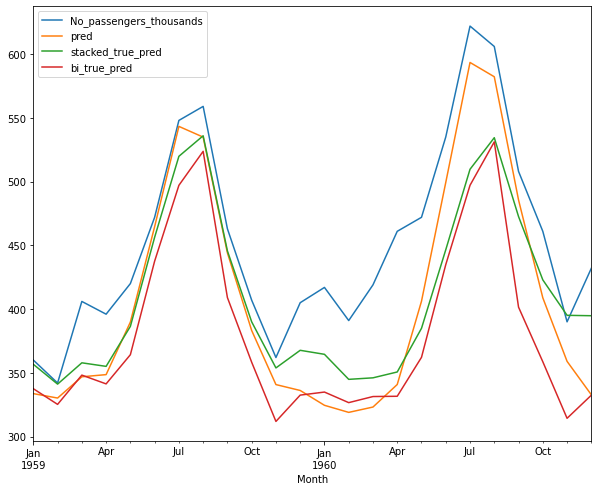

In [346]:

test_data.plot(figsize=(10,8))
plt.show()

# Bi-Direactional LSTM

In [326]:
from keras.layers import Bidirectional

In [375]:
bi_model = Sequential()
bi_model.add(Bidirectional(LSTM(100, activation='tanh',return_sequences=True), input_shape=(n_steps, n_features)))
bi_model.add(Bidirectional(LSTM(50, activation='tanh',return_sequences=True)))
bi_model.add(Bidirectional(LSTM(50, activation='tanh',return_sequences=True)))
bi_model.add(Bidirectional(LSTM(50, activation='tanh')))
bi_model.add(Dense(1))

bi_model.compile(optimizer='adam', loss='mse')

In [376]:
bidirectional_history= bi_model.fit(x_train, y_train, epochs=1000, verbose=0)

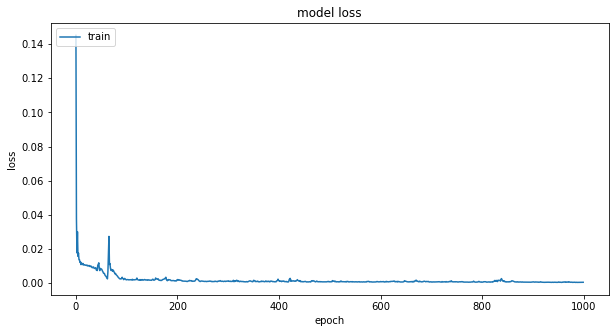

In [377]:
plt.figure(figsize=(10,5))
plt.plot(bidirectional_history.history['loss'])
#plt.plot(stacked_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [378]:
bi_test_pred = []
#last_batch = x_train[len(x_train)-n_steps:]
curr_batch= (scale_train[-n_steps:])
curr_batch = curr_batch.reshape(1,n_steps,n_features)
for i in range(len(test_data)):
    #last_batch = last_batch.reshape(1,n_steps,n_features)
    yhat = bi_model.predict(curr_batch, verbose=0)[0]
    bi_test_pred.append(yhat)
    curr_batch = np.append(curr_batch[:,1:,:],[[yhat]],axis=1)


In [379]:
bi_true_pred = scale.inverse_transform(bi_test_pred)

In [380]:
test_data['bi_true_pred'] = bi_true_pred

C:\Users\admin\AppData\Local\Temp\ipykernel_2240\1238026550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['bi_true_pred'] = bi_true_pred


## Model Evaluation

In [381]:
from sklearn.metrics import mean_squared_error
from math import sqrt
bi_rmse=sqrt(mean_squared_error(test_data['No_passengers_thousands'],bi_true_pred))
print(bi_rmse)

58.05126196450513


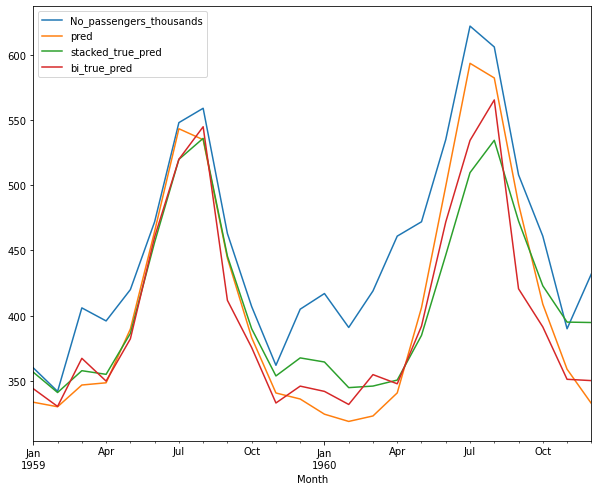

In [382]:
test_data.plot(figsize=(10,8))
plt.show()

In [351]:
vanilla_rmse

55.008573734288106

In [352]:
stacked_rmse

53.3790364991979

In [355]:
bi_rmse

77.54817150514334

In [383]:
model_loss= dict()

In [391]:
model_loss =pd.DataFrame({'Models' : ['Vanilla LSTM','Stacked LSTM','Bi-Directional LSTM'], 'Loss': [vanilla_rmse,stacked_rmse,bi_rmse]})

# Results 

In [392]:
model_loss

,Models,Loss
0,Vanilla LSTM,55.008574
1,Stacked LSTM,53.379036
2,Bi-Directional LSTM,58.051262


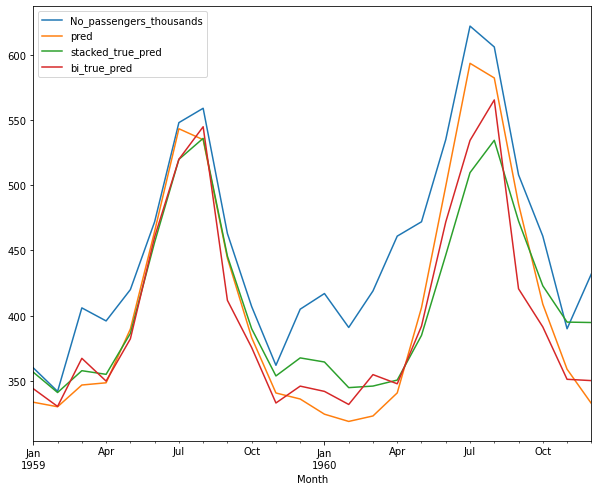

In [393]:
test_data.plot(figsize=(10,8))
plt.show()